In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('4m_61f_all.csv')
data.head()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,17,0.000,780,44194,0.0,60,28920,26400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
1,17,0.001,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
2,17,0.002,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
3,17,0.000,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,DDOS
4,17,0.001,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,DDOS


In [3]:
x = data["NewLabel"].value_counts()
print(x)

Normal            2403724
DDOS               611405
BruteForce         475321
Infiltration       268064
DoS                183477
MalwareActivty      91561
Name: NewLabel, dtype: int64


In [4]:
newLabel = data.iloc[:, -1:]
#Label Encoding for NewLabel column
from sklearn import preprocessing
newLabel_le = newLabel.apply(preprocessing.LabelEncoder().fit_transform)
newLabel_le.head()

,NewLabel
0,1
1,1
2,1
3,1
4,1


In [5]:
new_data = pd.concat([data.iloc[:, :-1],newLabel_le], axis=1)
new_data.head()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
0,17,0.000,780,44194,0.0,60,28920,26400,0,0,...,0,0,0,0,0,0,0,0,0,1
1,17,0.001,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17,0.002,863,45655,0.0,10,4820,4400,0,0,...,0,0,0,0,0,0,0,0,0,1
3,17,0.000,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,0.001,941,46739,0.0,4,1928,1760,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
#Reduce data
data_minimal = new_data.sample(n = 100)
data_minimal

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win,NewLabel
2544270,6,3.259,57320,3389,88.0,8,1572,1128,9,2153,...,2,0,16,12,1,2,0,66,66,5
1916930,6,0.000,3389,59267,88.0,1,54,0,0,0,...,0,0,1,0,1,0,0,0,0,5
3541951,6,0.846,34539,445,16.0,5,568,286,4,398,...,0,0,8,5,1,2,0,66,66,5
3508867,6,4.584,49318,80,7.0,5,379,97,4,459,...,2,0,8,2,0,2,1,66,66,5
3794636,6,0.844,62942,445,16.0,5,568,286,4,398,...,0,0,8,5,1,2,0,66,66,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605878,17,0.740,46969,26222,0.0,5,1042,832,5,554,...,0,0,0,0,0,0,0,0,0,0
497236,6,0.256,50437,80,7.0,4,572,344,3,430,...,0,0,6,3,0,2,0,66,66,0
2732046,6,0.188,3389,61392,114.0,3,1366,1192,2,356,...,0,0,5,4,0,0,0,0,0,5
553056,6,0.548,59603,80,7.0,4,657,429,3,186,...,0,0,6,2,0,2,0,66,66,0


In [7]:
x = data_minimal.iloc[:,:-1]
y = data_minimal.iloc[:,-1:]

In [8]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
# XGBoost Classification Feature Importance
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train, y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:23:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.02331
Feature: 1, Score: 0.05295
Feature: 2, Score: 0.02337
Feature: 3, Score: 0.12692
Feature: 4, Score: 0.03363
Feature: 5, Score: 0.01738
Feature: 6, Score: 0.04517
Feature: 7, Score: 0.00094
Feature: 8, Score: 0.08009
Feature: 9, Score: 0.01104
Feature: 10, Score: 0.02241
Feature: 11, Score: 0.00298
Feature: 12, Score: 0.00433
Feature: 13, Score: 0.02126
Feature: 14, Score: 0.00952
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00029
Feature: 17, Score: 0.00047
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.01034
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.02059
Feature: 23, Score: 0.00568
Feature: 24, Score: 0.00000

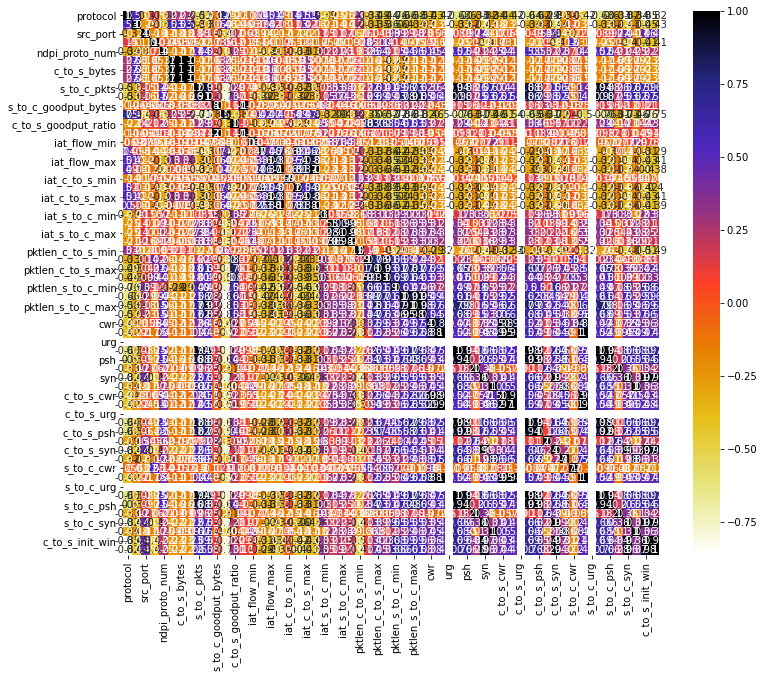

In [10]:
#Colleration matrix 
import seaborn as sns 
plt.figure(figsize = (12,10))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [11]:
X_train.corr()

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,c_to_s_bytes,c_to_s_goodput_bytes,s_to_c_pkts,s_to_c_bytes,...,s_to_c_cwr,s_to_c_ece,s_to_c_urg,s_to_c_ack,s_to_c_psh,s_to_c_rst,s_to_c_syn,s_to_c_fin,c_to_s_init_win,s_to_c_init_win
protocol,1.000000,0.528824,-0.296006,0.151800,-0.339668,0.272243,0.272065,0.271920,-0.509325,-0.525534,...,-0.055691,-0.416305,NaN,-0.631438,-0.603957,-0.329479,-0.816754,-0.335112,-0.848688,-0.819459
duration,0.528824,1.000000,-0.243653,-0.103656,-0.326360,0.533415,0.533315,0.533219,-0.330594,-0.305797,...,-0.029583,-0.220348,NaN,-0.333600,-0.319489,-0.174067,-0.431334,-0.177194,-0.448586,-0.433149
src_port,-0.296006,-0.243653,1.000000,-0.192269,-0.173028,-0.183976,-0.183964,-0.183960,0.146871,0.157530,...,-0.224188,0.017455,NaN,0.089161,0.096670,0.272273,0.438913,-0.171946,0.463447,0.445768
dst_port,0.151800,-0.103656,-0.192269,1.000000,0.014201,-0.053254,-0.053225,-0.053146,-0.119461,-0.165600,...,0.530898,-0.145887,NaN,-0.245262,-0.211862,-0.062055,-0.403283,-0.165324,-0.414348,-0.408115
ndpi_proto_num,-0.339668,-0.326360,-0.173028,0.014201,1.000000,-0.165601,-0.165423,-0.165251,0.442326,0.524753,...,0.138042,0.396197,NaN,0.519255,0.543824,0.207491,0.242513,0.248436,0.217152,0.245910
c_to_s_pkts,0.272243,0.533415,-0.183976,-0.053254,-0.165601,1.000000,1.000000,1.000000,-0.170181,-0.157316,...,-0.015202,-0.113247,NaN,-0.171738,-0.164266,-0.089724,-0.222309,-0.091105,-0.231001,-0.223035
c_to_s_bytes,0.272065,0.533315,-0.183964,-0.053225,-0.165423,1.000000,1.000000,1.000000,-0.169934,-0.157051,...,-0.015162,-0.113065,NaN,-0.171463,-0.163945,-0.089734,-0.222146,-0.090976,-0.230826,-0.222846
c_to_s_goodput_bytes,0.271920,0.533219,-0.183960,-0.053146,-0.165251,1.000000,1.000000,1.000000,-0.169756,-0.156830,...,-0.015095,-0.112873,NaN,-0.171256,-0.163669,-0.089778,-0.222033,-0.090910,-0.230699,-0.222703
s_to_c_pkts,-0.509325,-0.330594,0.146871,-0.119461,0.442326,-0.170181,-0.169934,-0.169756,1.000000,0.908197,...,-0.102419,0.397868,NaN,0.942851,0.876103,0.262222,0.573692,0.668580,0.593109,0.603955
s_to_c_bytes,-0.525534,-0.305797,0.157530,-0.165600,0.524753,-0.157316,-0.157051,-0.156830,0.908197,1.000000,...,-0.104172,0.480841,NaN,0.904736,0.867508,0.245730,0.532802,0.616613,0.572355,0.582963


In [12]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

36

In [14]:
corr_features

{'ack',
 'c_to_s_ack',
 'c_to_s_bytes',
 'c_to_s_cwr',
 'c_to_s_ece',
 'c_to_s_fin',
 'c_to_s_goodput_bytes',
 'c_to_s_init_win',
 'c_to_s_psh',
 'c_to_s_syn',
 'data_ratio',
 'ece',
 'iat_c_to_s_avg',
 'iat_c_to_s_max',
 'iat_c_to_s_stddev',
 'iat_flow_stddev',
 'iat_s_to_c_max',
 'iat_s_to_c_stddev',
 'pktlen_c_to_s_avg',
 'pktlen_c_to_s_max',
 'pktlen_c_to_s_stddev',
 'pktlen_s_to_c_avg',
 'pktlen_s_to_c_max',
 'pktlen_s_to_c_min',
 'pktlen_s_to_c_stddev',
 'psh',
 's_to_c_ack',
 's_to_c_bytes',
 's_to_c_ece',
 's_to_c_fin',
 's_to_c_goodput_ratio',
 's_to_c_init_win',
 's_to_c_psh',
 's_to_c_rst',
 's_to_c_syn',
 'syn'}

In [15]:
X_train_drop = X_train.drop(corr_features, axis = 1)
X_test_drop = X_test.drop(corr_features, axis = 1)
X_train_drop

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,s_to_c_pkts,s_to_c_goodput_bytes,c_to_s_goodput_ratio,iat_flow_min,...,iat_s_to_c_avg,pktlen_c_to_s_min,cwr,urg,rst,fin,c_to_s_urg,c_to_s_rst,s_to_c_cwr,s_to_c_urg
647971,6,0.292,63963,80,7.0,7,7,1193,60.7,10,...,45.6,54,0,0,0,0,0,0,0,0
395388,6,0.437,61172,80,7.0,5,5,1478,68.9,2,...,53.2,54,0,0,0,0,0,0,0,0
497236,6,0.256,50437,80,7.0,4,3,250,60.0,1,...,63.5,54,0,0,0,0,0,0,0,0
1652983,6,2.021,56694,3389,88.0,9,7,1429,67.8,1,...,340.4,54,1,0,1,0,0,1,0,0
570765,17,0.107,46969,51900,0.0,5,6,353,78.9,1,...,18.5,62,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136688,17,2859.930,30127,22,0.0,143,0,0,43.2,1,...,0.0,74,0,0,0,0,0,0,0,0
1537752,17,65.958,11536,80,188.0,484,0,0,43.2,1,...,0.0,74,0,0,0,0,0,0,0,0
3445907,6,1.974,60255,3389,88.0,8,7,1581,72.1,1,...,331.4,54,1,0,1,0,0,1,0,0
2736168,6,11.935,21756,3389,88.0,14,13,1731,65.2,18,...,925.8,54,1,0,1,1,0,1,0,0


In [16]:
# XGBoost Classification Feature Importance
from xgboost import XGBClassifier
from matplotlib import pyplot

model = XGBClassifier()
model.fit(X_train_drop, y_train)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

[08:24:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Feature: 0, Score: 0.06041
Feature: 1, Score: 0.06187
Feature: 2, Score: 0.05671
Feature: 3, Score: 0.10917
Feature: 4, Score: 0.06501
Feature: 5, Score: 0.08810
Feature: 6, Score: 0.12514
Feature: 7, Score: 0.00359
Feature: 8, Score: 0.06052
Feature: 9, Score: 0.02174
Feature: 10, Score: 0.00126
Feature: 11, Score: 0.01262
Feature: 12, Score: 0.10037
Feature: 13, Score: 0.06265
Feature: 14, Score: 0.02085
Feature: 15, Score: 0.08269
Feature: 16, Score: 0.01211
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.05519
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\bengisu.kavurdu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


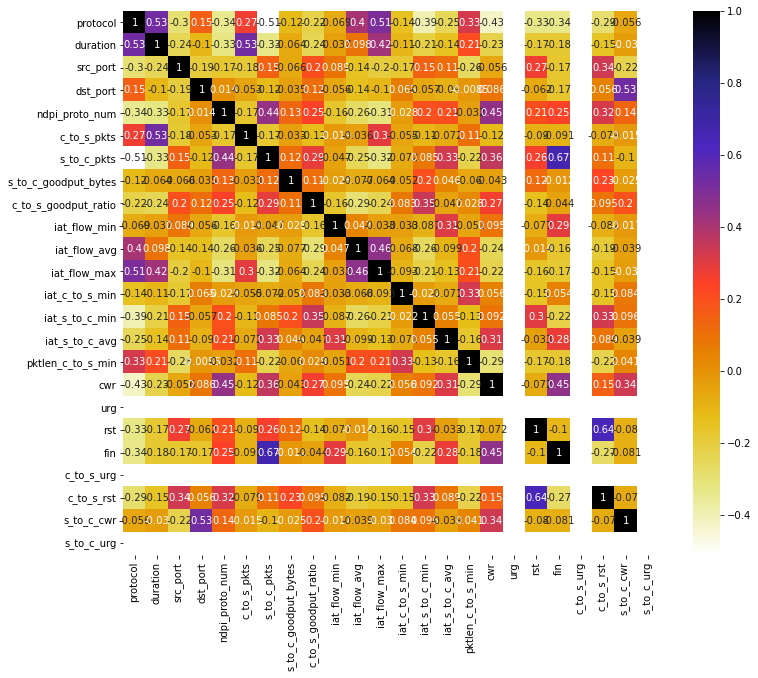

In [17]:
#Colleration matrix 
import seaborn as sns 
plt.figure(figsize = (12,10))
cor = X_train_drop.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [18]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(X_train_drop, 0.6)
len(set(corr_features))

2

In [20]:
corr_features

{'c_to_s_rst', 'fin'}

In [21]:
X_train_final = X_train_drop.drop(corr_features, axis = 1)
X_test_final = X_test_drop.drop(corr_features, axis = 1)
X_train_final

,protocol,duration,src_port,dst_port,ndpi_proto_num,c_to_s_pkts,s_to_c_pkts,s_to_c_goodput_bytes,c_to_s_goodput_ratio,iat_flow_min,...,iat_c_to_s_min,iat_s_to_c_min,iat_s_to_c_avg,pktlen_c_to_s_min,cwr,urg,rst,c_to_s_urg,s_to_c_cwr,s_to_c_urg
647971,6,0.292,63963,80,7.0,7,7,1193,60.7,10,...,0,0,45.6,54,0,0,0,0,0,0
395388,6,0.437,61172,80,7.0,5,5,1478,68.9,2,...,0,2,53.2,54,0,0,0,0,0,0
497236,6,0.256,50437,80,7.0,4,3,250,60.0,1,...,0,1,63.5,54,0,0,0,0,0,0
1652983,6,2.021,56694,3389,88.0,9,7,1429,67.8,1,...,0,140,340.4,54,1,0,1,0,0,0
570765,17,0.107,46969,51900,0.0,5,6,353,78.9,1,...,15,0,18.5,62,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136688,17,2859.930,30127,22,0.0,143,0,0,43.2,1,...,0,0,0.0,74,0,0,0,0,0,0
1537752,17,65.958,11536,80,188.0,484,0,0,43.2,1,...,0,0,0.0,74,0,0,0,0,0,0
3445907,6,1.974,60255,3389,88.0,8,7,1581,72.1,1,...,0,154,331.4,54,1,0,1,0,0,0
2736168,6,11.935,21756,3389,88.0,14,13,1731,65.2,18,...,0,18,925.8,54,1,0,1,0,0,0
